# Naise Paul--- 10345047

1. Bayes theorem practice Use Bayes theorem to solve the following problem: 
 
A woman takes either the bus or taxi to her job. 2/3rds of the time she takes the bus to work, and 1/3rd of the time she takes a taxi. If she takes a taxi, she is at work on time with probability 0.99. If she takes bus, she is at work on time with probability 0.85. Given that she was on time on a particular morning, what is the probability that she took a taxi that morning? 
 
Show your calculations. 
Showing your workings, calculate the right answer in your notebook (10 marks) 

In [1]:
# Bayers Theorm P(H/E)=P(E/H)*P(H)/P(E)

probability_taxi_ontime =.99   #P(E1/H1)
probability_taking_taxi = .3333  # P(H1) = 1/3

probability_bus_ontime  = .85  # P(E2/H2)
probility_taking_bus    = .6666  # P(E2) = 2/3

probability_ontime_taxi = (probability_taxi_ontime*probability_taking_taxi)/((probability_taxi_ontime*probability_taking_taxi)+(probability_bus_ontime*probility_taking_bus ))
# P(H1/E1) = P(E1/H1)/(P(E1/H1)+P(E2/H2))

print round(probability_ontime_taxi,3)

0.368


2. Elementary inference of the parameters of a normal 
 
Using PYMC, calculate the posterior values for mean height and some measure of deviation, each of men and women using this dataset:   https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv 
 
Plot the posterior mean and deviation for men and for women. 
 

In [2]:
%matplotlib inline
import pymc as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:\Users\Naise\OneDrive\DBS\9 Advanced Analytics\CA\Ca2\Howell1.csv', sep=';')
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [4]:
data.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


In [57]:
d1 = data[data.male == 0]
d2 =data[data.male == 1]
d1.height.head()
#d2.head()

1    139.700
2    136.525
4    145.415
6    149.225
8    147.955
Name: height, dtype: float64

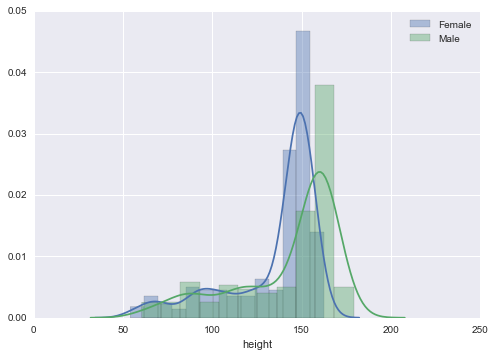

In [58]:
sns.distplot(d1.height, label='Female')
sns.distplot(d2.height, label='Male')
plt.legend();

 [-----------------100%-----------------] 11000 of 11000 complete in 1.9 sec

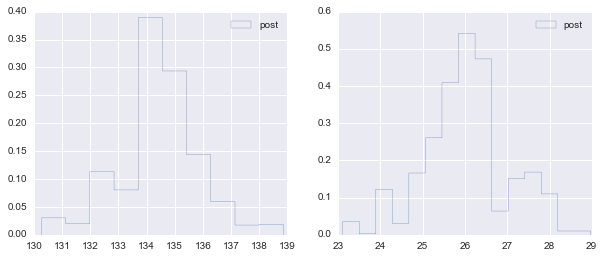

In [59]:

y = d1.height

# define priors
mu = pm.Uniform('mu', lower=0, upper=200)
tau = pm.Uniform('tau', lower=0, upper=2)

# define likelihood
y_obs = pm.Normal('Y_obs', mu=mu, tau=tau, value=y, observed=True)

# inference
m = pm.Model([mu, tau, y])
mc = pm.MCMC(m)
mc.sample(iter=11000, burn=10000)
plt.figure(figsize=(10,4));
plt.subplot(121)
plt.hist(mu.trace(),  histtype='step', normed=True, label='post');
plt.legend(loc='best');
plt.subplot(122)
plt.hist(np.sqrt(1.0/tau.trace()), 15, histtype='step', normed=True, label='post');
plt.legend(loc='best');

 [-----------------100%-----------------] 11000 of 11000 complete in 1.9 sec

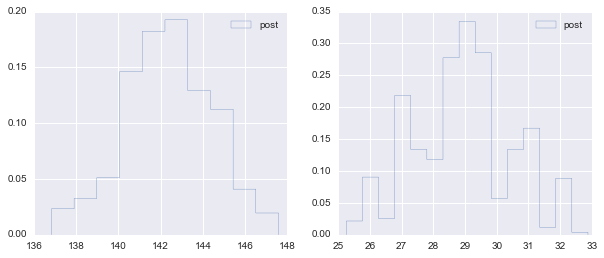

In [60]:
y = d2.height

# define priors
mu = pm.Uniform('mu', lower=0, upper=200)
tau = pm.Uniform('tau', lower=0, upper=2)

# define likelihood
y_obs = pm.Normal('Y_obs', mu=mu, tau=tau, value=y, observed=True)

# inference
m = pm.Model([mu, tau, y])
mc = pm.MCMC(m)
mc.sample(iter=11000, burn=10000)
plt.figure(figsize=(10,4));
plt.subplot(121)
plt.hist(mu.trace(),  histtype='step', normed=True, label='post');
plt.legend(loc='best');
plt.subplot(122)
plt.hist(np.sqrt(1.0/tau.trace()), 15, histtype='step', normed=True, label='post');
plt.legend(loc='best');